In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.optimize


In [2]:
def F(x):
    return 1.0/(x**2 - 3*x +2)

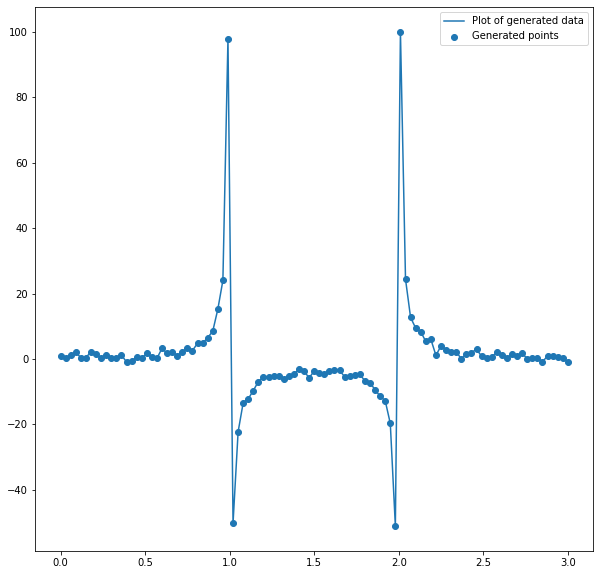

In [9]:
np.random.seed(42)
xk = []
yk = []
k = 100
for i in range (k+1):
    xk.append(3*i/k)
    if F(xk[i]) < -100:
        yk.append(-100 + np.random.randn())
    elif -100 <= F(xk[i]) <= 100:
        yk.append(F(xk[i]) + np.random.randn())
    elif F(xk[i]) > 100:
        yk.append(100 + np.random.randn())
xk = np.asarray(xk)
yk = np.asarray(yk)
plt.figure(figsize = (10, 10))
plt.scatter(xk, yk)
plt.plot(xk, yk)
plt.legend(['Plot of generated data', 'Generated points'])

In [12]:
def Approximant(x, a, b, c, d):
    return (a* x + b) / (x**2 + c*x + d)

def OptiCost(params, real, x ):
    a, b, c, d = params 
    error = sum((real - Approximant(x, a, b, c, d))**2)
    return error

def OptiCostVec(params, real, x ):
    a, b, c, d = params 
    error = (real - Approximant(x, a, b, c, d))
    return error

In [27]:
#The easiest way to take function from section Global Optimization (https://docs.scipy.org/doc/scipy/reference/optimize.html) as methods for this lab 
# Dual Annealing is a modification of Simulated Annealing (Dr Chunaev told about it)

Dual_Annealing = scipy.optimize.dual_annealing(OptiCost, ((-2, 2), (-2, 2), (-2, 2), (-2, 2)), args=(yk, xk))
print('Simulated Annealing:')
print('Params', Dual_Annealing.x , ' iterations: ',  Dual_Annealing.nit)

Differential_Evolution = scipy.optimize.differential_evolution(OptiCost, ((-2, 2), (-2, 2), (-2, 2), (-2, 2)), args=(yk, xk), tol=0.001)
print('Differential evolution:')
print('Params', Differential_Evolution.x , ' iterations: ',  Differential_Evolution.nit)

Simulated Annealing:
Params [-0.9997199   0.99942033 -1.99999854  0.99999763]  iterations:  1000
Differential evolution:
Params [-1.05132958 -1.70299423  0.73633994 -1.73709406]  iterations:  70


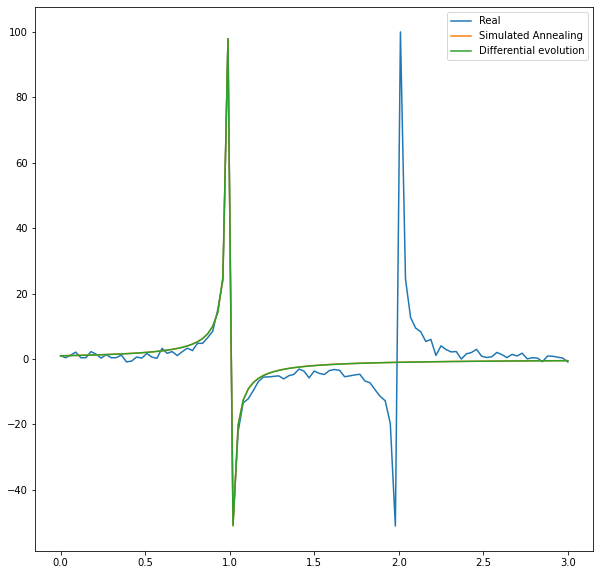

In [29]:
plt.figure(figsize = (10, 10))
plt.plot(xk, yk)
plt.plot(xk, Approximant(xk, *Dual_Annealing.x))
plt.plot(xk, Approximant(xk, *Differential_Evolution.x))
plt.legend(['Real', 'Simulated Annealing', 'Differential evolution'])

In [35]:
LMA = scipy.optimize.least_squares(OptiCostVec, [0, 0, 1, 1],args=(yk, xk ), method='lm', xtol=0.001)
Nelder_Mead = scipy.optimize.minimize(OptiCost, x0 = [0, 0, 1, 1], args=(yk, xk ), tol=0.001, method='Nelder-Mead')
print('LMA:')
print('Params', LMA.x , ' function eval: ',  LMA.nfev)

print('Nelder-Mead:')
print('Params', Nelder_Mead.x , ' iterations: ',  Nelder_Mead.nit)

LMA:
Params [-0.52681958  0.5356057  -1.96549072  0.96584012]  function eval:  72
Nelder-Mead:
Params [ 0.00802401  0.00915087 -1.36665235  0.37306034]  iterations:  146


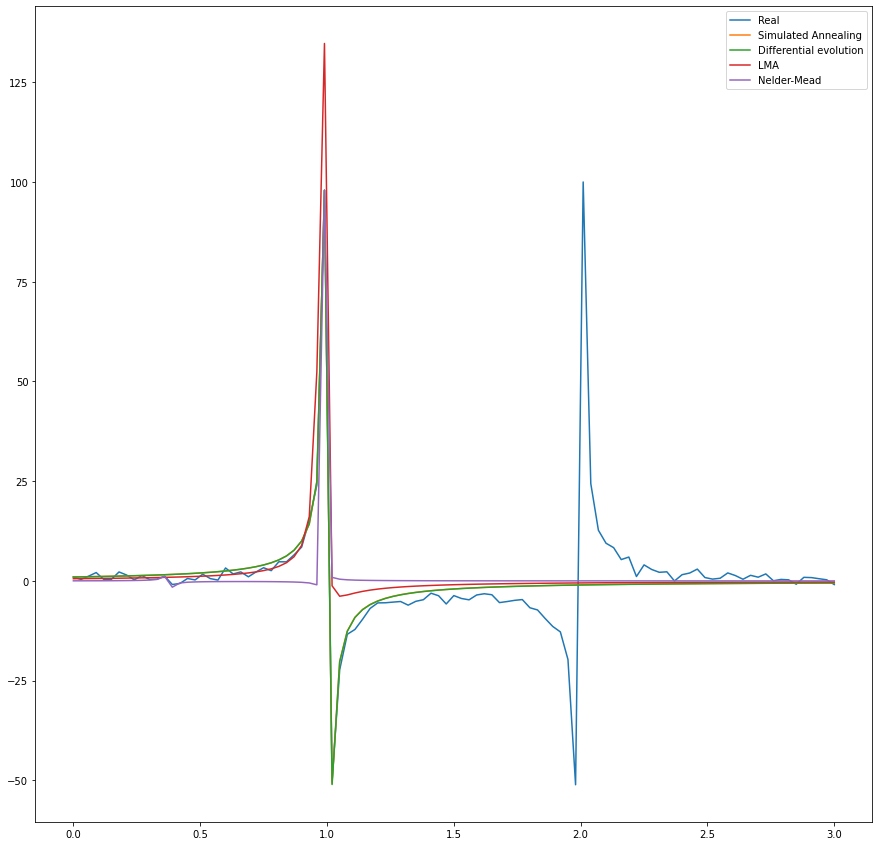

In [36]:
 #Let's compare order methods with metaheuristic ones
plt.figure(figsize = (15, 15))
plt.plot(xk, yk)
plt.plot(xk, Approximant(xk, *Dual_Annealing.x))
plt.plot(xk, Approximant(xk, *Differential_Evolution.x))
plt.plot(xk, Approximant(xk, *LMA.x))
plt.plot(xk, Approximant(xk, *Nelder_Mead.x))
plt.legend(['Real', 'Simulated Annealing', 'Differential evolution', 'LMA', 'Nelder-Mead'])

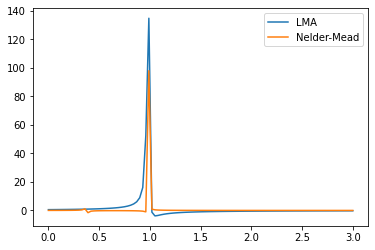

In [39]:
plt.plot(xk, Approximant(xk, *LMA.x))
plt.plot(xk, Approximant(xk, *Nelder_Mead.x))
plt.legend([ 'LMA', 'Nelder-Mead'])